In [49]:
import copy
import os
import matplotlib.pyplot as plt
import pandas as pd

from qiskit import Aer
from qiskit.providers.fake_provider import (FakeMelbourneV2, FakeVigoV2, FakeOurenseV2,
                                            FakeValenciaV2, FakeAthensV2, FakeSantiagoV2)

from core import VQE_NoiseExp
from hamiltonians import H_2_hamiltonian, H_2_NRE

In [50]:
# Preparing data to plot in the list `exp_df`
path = 'data'
csv_list = ['data/1667151721.8489265_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_aer_simulator_5_200.csv',
            'data/1667156249.295937_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_fake_melbourne_v2_5_200.csv',
            'data/1667175520.1659818_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_fake_vigo_v2_5_200.csv',
            'data/1667182096.540745_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_fake_ourense_v2_5_200.csv',
            'data/1667186921.3146465_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_fake_valencia_v2_5_200.csv',
            'data/1667202645.4357073_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_fake_athens_v2_5_200.csv',
            'data/1667208950.3907232_VQE_NoiseExp_results_H_2_hamiltonian_exp_full_fake_santiago_v2_5_200.csv']
backends = [Aer.get_backend('aer_simulator'), FakeMelbourneV2(), FakeVigoV2(), FakeOurenseV2(),
            FakeValenciaV2(), FakeAthensV2(), FakeSantiagoV2()]
graph_colors = {'aer_simulator': 'y', 'fake_melbourne_v2': 'k', 'fake_vigo_v2': 'g', 'fake_ourense_v2': 'r',
                'fake_valencia_v2': 'c', 'fake_athens_v2': 'm', 'fake_santiago_v2': 'b'}
exp = VQE_NoiseExp(H_2_hamiltonian, 'H_2_hamiltonian_exp_full', H_2_NRE)

exp_df = []
for f,b in zip(csv_list, backends):
    try:
        name = b.name()
    except TypeError:
        name = b.name
        
    exp_df.append(exp.csv_data_to_table(f, caption=name))

In [79]:
def plot_results(exp_df_list, start_slice=0, end_slice=None, figsize=None):
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    if end_slice is None:
        end_slice = len(exp_df_list)

    for df in exp_df_list[start_slice:end_slice]:
        d = df['df']
        s = df['df_styler']
        d.set_index('Circuit Id')
        d.sort_values('Circuit Id', inplace=True)
        plt.scatter(d['Circuit Id'], d['Energy difference'], label=s.caption, s=10, linewidth=0.1, c=graph_colors[s.caption])
        plt.plot(d['Circuit Id'], d['Energy difference'], c=graph_colors[s.caption])
        plt.grid(visible=True)

    x_max = exp_df_list[0]['df']['Circuit Id'].max() + 1
    plt.xticks([i for i in range(1, x_max) if i != 10])
    plt.xlabel('Circuit ID')
    plt.ylabel('Energy Difference (Hartree)')

    plt.legend()
    plt.show()

In [23]:
# Filters

# Circuits 1-12 only
for d in exp_df:
    c_1_12_filt = d['df']['Circuit Id'] <= 12
    d['df'] = d['df'][c_1_12_filt]


In [52]:
# Filters

# To remove circuit 10 run this cell
for d in exp_df:
    no_10_filt = d['df']['Circuit Id'] != 10
    d['df'] = d['df'][no_10_filt]

C:\Users\Ohad\AppData\Local\Temp\ipykernel_14844\4151676332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.sort_values('Circuit Id', inplace=True)


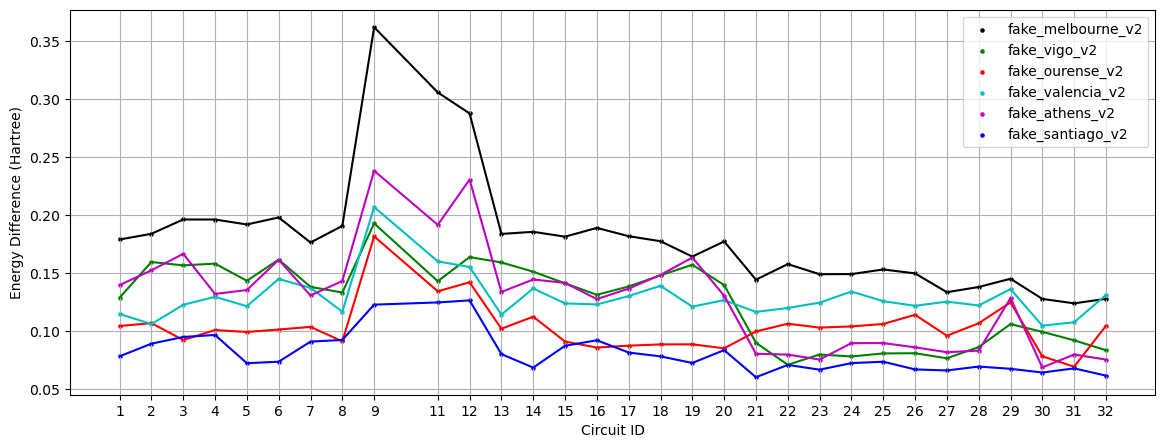

In [82]:
plot_results(exp_df, start_slice=1, figsize=(14,5))

In [44]:
# Filters for p

# Circuits 1-12 only
p_1_12_filt = pdf['Circuit_ID'] <= 12

In [55]:
# Filters for p

# No circuit 10
p_no_10_filt = pdf['Circuit_ID'] != 10

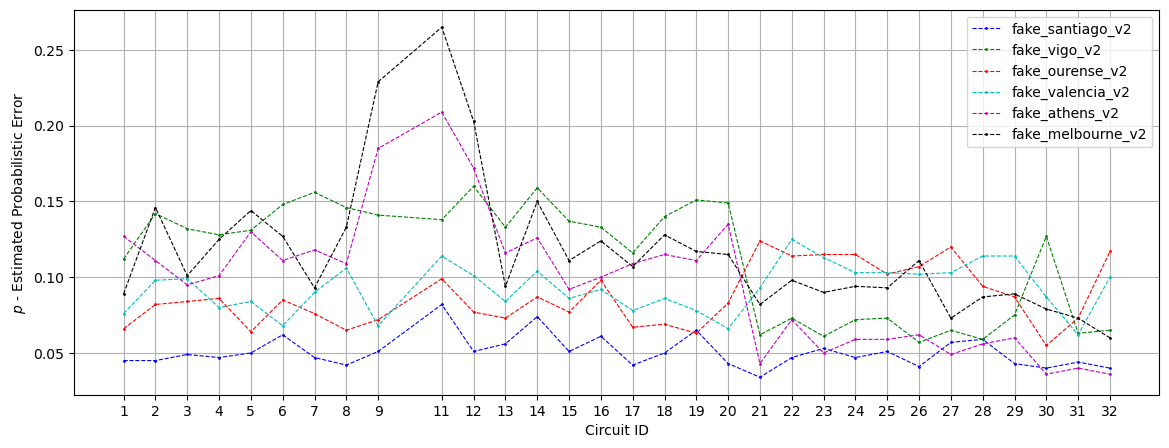

In [84]:
pdf = pd.read_csv('data/1667438476.3634913_ent_circuits_benchmarking.csv')

plt.figure(figsize=(14,5))
x = pdf['Circuit_ID'][p_no_10_filt]

for b in pdf.columns[1:]:
    plt.plot(x,1 - pdf[b][p_no_10_filt], label=b, c=graph_colors[b], linestyle="--", marker='o', markersize=1, linewidth=0.8)

plt.xticks([i for i in range(1,len(x) + 2) if i != 10])
plt.legend()
plt.grid()
plt.xlabel('Circuit ID')
plt.ylabel('$p$ - Estimated Probabilistic Error')

plt.show()